**THE PIZZA CHALLENGE**

For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:

Welcome aboard, we're glad you're here to help!

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.

Here are some questions that we'd like to be able to answer:

1. What days and times do we tend to be busiest?


2. How many pizzas are we making during peak periods?


3. What are our best and worst-selling pizzas?


4. What's our average order value?


5. Which size of pizza are we most selling ? 


**PART 1**

Let's import the libraries and load the dataset 

In [131]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Load the dataset : 

df = pd.read_csv("PizzaSales.csv", sep = ";")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01/01/2015,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


**PART 2** 

Let's now try to answer the questions. 

**1. What days and times do we tend to be busiest?**

/var/folders/hv/9rl2bnkn0psdzsdljlm1hcrr0000gn/T/ipykernel_20885/3940031470.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["order_date"] = pd.to_datetime(df["order_date"])


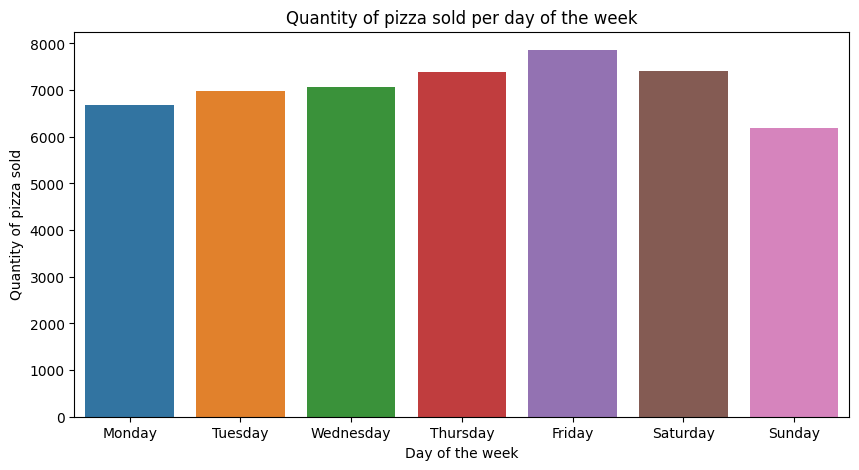

In [133]:
df["order_date"] = pd.to_datetime(df["order_date"])
df['day_of_week'] = df['order_date'].dt.day_name()
df.head()

quantity_per_day = df.groupby("day_of_week")["quantity"].sum()
quantity_per_day

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
quantity_per_day = quantity_per_day.reindex(days)
quantity_per_day

plt.figure(figsize=(10,5))
sns.barplot(x = quantity_per_day.index, y = quantity_per_day.values)
plt.title("Quantity of pizza sold per day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Quantity of pizza sold")
plt.show()

We can see that the busiest day of the week is friday, followed by thursday and saturday. Conversely, the least busy day is Sunday.

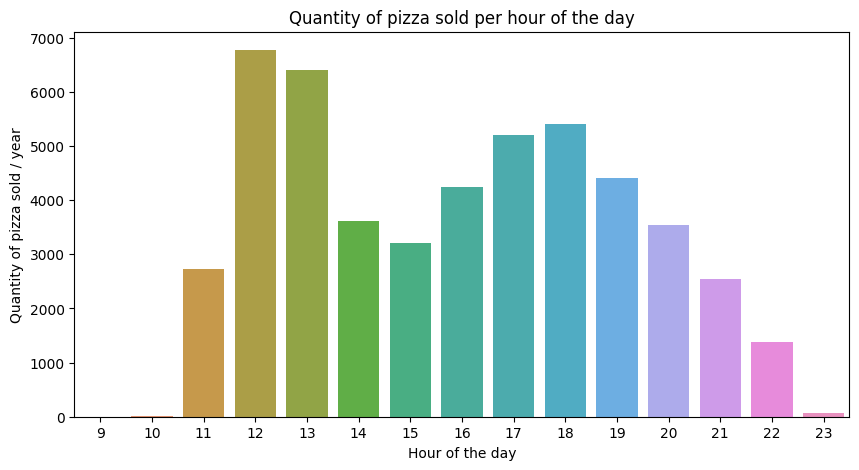

In [134]:
df["order_time"] = pd.to_datetime(df["order_time"])
df["hour"] = df["order_time"].dt.hour
df.head()

quantity_per_hour = df.groupby("hour")["quantity"].sum()
quantity_per_hour

plt.figure(figsize=(10,5))
sns.barplot(x = quantity_per_hour.index, y = quantity_per_hour.values)
plt.title("Quantity of pizza sold per hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Quantity of pizza sold / year")
plt.show()


The time when there are the most activities is at 12:00 and 13:00. We can also observe another peak of activity at around 17:00 and 18:00.

**2. How many pizzas are we making during peak periods?**

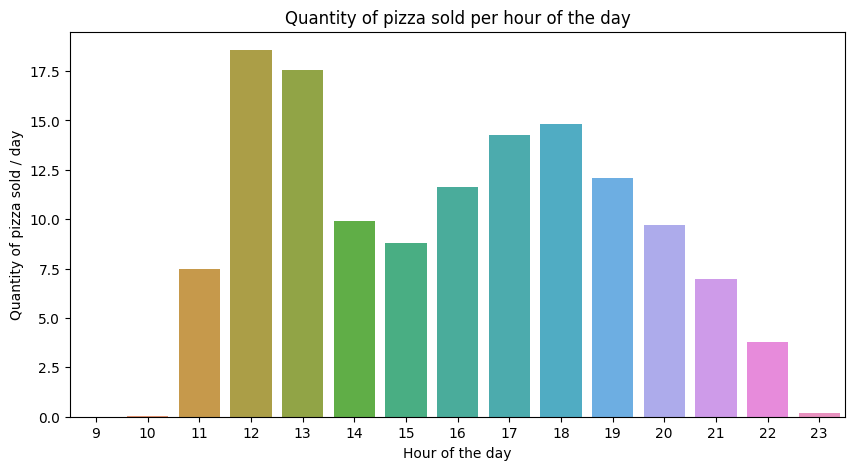

In [135]:
df.head()

quantity_per_hour = df.groupby("hour")["quantity"].sum()
quantity_per_hour

quantity_per_hour = quantity_per_hour/365
quantity_per_hour

plt.figure(figsize=(10,5))
sns.barplot(x = quantity_per_hour.index, y = quantity_per_hour.values)
plt.title("Quantity of pizza sold per hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Quantity of pizza sold / day")
plt.show()



We can observe that during peak period, the pizzeria deliver around 18 pizzas per hour. 

**3. What are our best and worst-selling pizzas?**

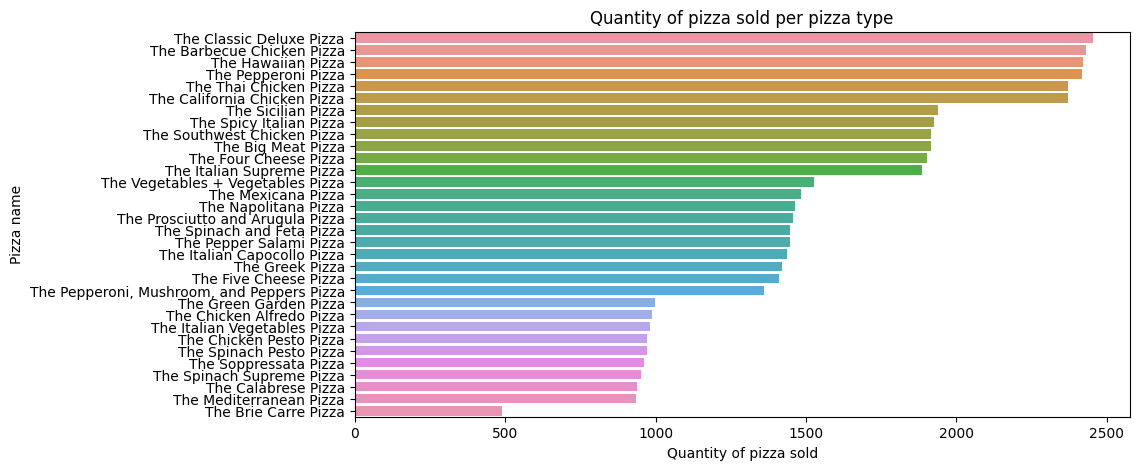

In [136]:
#For each pizza name, we want to know the sum of the quantity

quantity_per_pizza = df.groupby("pizza_name")["quantity"].sum()
quantity_per_pizza = quantity_per_pizza.sort_values(ascending = False)
quantity_per_pizza

plt.figure(figsize=(10,5))
sns.barplot(x = quantity_per_pizza.values, y = quantity_per_pizza.index)
plt.title("Quantity of pizza sold per pizza type")
plt.xlabel("Quantity of pizza sold")
plt.ylabel("Pizza name")
plt.show()


This graph give us a good indication of the best and worst selling pizza. 

We can clearly see that there is 6 pizza that we can name as "best sellers". 
- The Classic Deluxe Pizza 
- The Barbecue Chicken Pizza 
- The Hawaiian Pizza 
- The Pepperoni Pizza
- THe Thai Chicken Pizza 
- The California Chicken Pizza 

In term of worst selling we can see that the brie carre pizza don't have a great success. 

**4. What's our average order value?**

In [137]:
#Convert total_price and unit_price to float

df["total_price"] = df["total_price"].str.replace(",", ".")
df["total_price"] = df["total_price"].astype(float)

df["unit_price"] = df["unit_price"].str.replace(",", ".")
df["unit_price"] = df["unit_price"].astype(float)

In [141]:
print("The average order value is : ")
print(round(df['total_price'].mean(),2))

The average order value is : 
16.82


**5. Which size of pizza are we most selling ?**

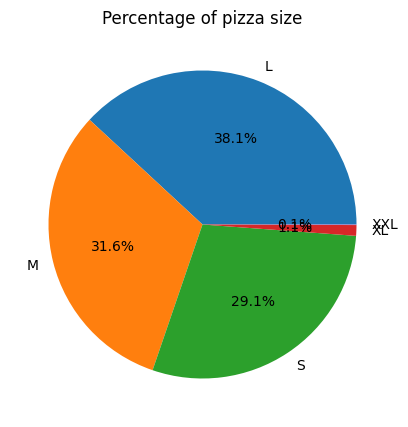

In [144]:
pizza_size = df["pizza_size"].value_counts()
pizza_size

plt.figure(figsize=(10,5))
plt.pie(pizza_size.values, labels = pizza_size.index, autopct='%1.1f%%')
plt.title("Percentage of pizza size")
plt.show()




We can see that most of our pizzas are in the L size (38.1%), followed by the M and S size (31.6% and 29.1%). The XL and XXL size represent a very small part of our selling (1.1% and 0.1%). 